Take the results of synthetic_classes.py. Plot the histograms of error values of the training and test classes to evaluate the interclass separation and hence the performance of the algorithm.

In [64]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math
from collections import Counter
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import segment_cluster_scaled as sc
import importlib
importlib.reload(sc)
np.random.seed(0)
from scipy.stats import zscore


In [65]:
results_file="valid_results_20190605_bp7.csv"
k_clusters=[150]
seg_lens=[10,50,100,150,200]

#"normal"/training lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier"/test lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

no. clusters:  150 segment length:  10
Mean rho error: 	 253.07561418874158 Max rho error:  419.49347594473693


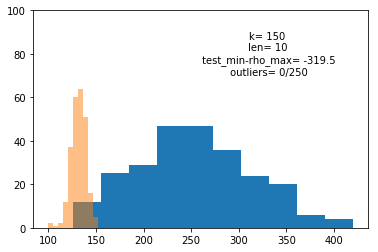

Mean test error: 	 132.21895985608242
Min test-max rho error:  -319.5197599680629
no. misclassified observations:  250

no. clusters:  150 segment length:  50
Mean rho error: 	 377.5127420290711 Max rho error:  671.7941767040652


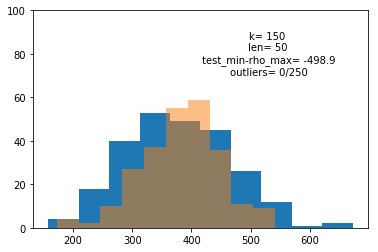

Mean test error: 	 382.16129720178134
Min test-max rho error:  -498.93629045667365
no. misclassified observations:  250

no. clusters:  150 segment length:  100
Mean rho error: 	 523.2064544525191 Max rho error:  890.922221166668


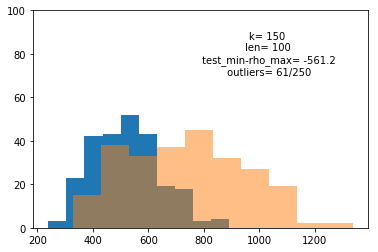

Mean test error: 	 737.1091761195199
Min test-max rho error:  -561.152335696375
no. misclassified observations:  189

no. clusters:  150 segment length:  150
Mean rho error: 	 633.9451890208067 Max rho error:  1055.9049950420263


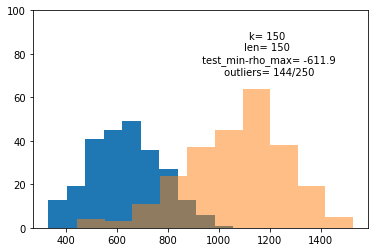

Mean test error: 	 1069.0797716305533
Min test-max rho error:  -611.8572215841344
no. misclassified observations:  106

no. clusters:  150 segment length:  200
Mean rho error: 	 691.5111224107678 Max rho error:  1108.8226426523343


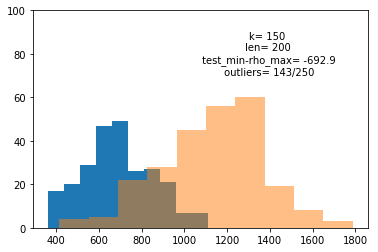

Mean test error: 	 1133.6248264762382
Min test-max rho error:  -692.9420629576488
no. misclassified observations:  107



In [66]:
#enter the appropriate file name and hyperparameters used
results=np.loadtxt(results_file, dtype=float, delimiter=",")

for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print("no. clusters: ", k_cluster, "segment length: ", seg_len)
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        max_rho=np.max(train[:,-1])
        print("Mean rho error: \t", np.mean(train[:,-1]), "Max rho error: ", max_rho)
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        min_test=np.min(test[:,-1])
        counter=0
        for t in test[:,-1]:
            if t<max_rho:
                counter+=1
        f = plt.figure()
        ax = f.add_subplot(111)
        plt.hist(train[:,-1])
        plt.hist(test[:,-1],alpha=0.5)
        #plt.xlim([0,1.2])
        plt.ylim([0,100])
        plt.text(0.7,0.8,"k= {}\nlen= {}\n test_min-rho_max= {}\n outliers= {}/250".format(k_cluster, seg_len, round(min_test-max_rho,1), 250-counter),
                 ha='center', va='center', transform=ax.transAxes)
        plt.show()
        
        print("Mean test error: \t", np.mean(test[:,-1]))
        print("Min test-max rho error: ", min_test-max_rho)
        print("no. misclassified observations: ", counter)
        
        print()

Take the results of synthetic_classes.py. Extract the indices of X best/worst reconstructions of training and test classes to understand how to improve the algorithm; how to error of reconstruction of the different classes more different. 

In [67]:
results=np.loadtxt(results_file, dtype=float, delimiter=",")
#structure of the lines in the file: cluster number index, segment length index, training=0 test=1, lightcurve index, error)

extract_x=5

output=[]
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        output.append(("no. clusters: ", k_cluster, "segment length: ", seg_len))
        output.append("worst/best training, wort/best test")
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        sorted_train=train[train[:,-1].argsort()]
        worst_train=sorted_train[-extract_x:,3].astype(int)
        best_train=sorted_train[0:extract_x,3].astype(int)        
        
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        sorted_test=test[test[:,-1].argsort()]
        worst_test=sorted_test[-extract_x:,3].astype(int)
        best_test=sorted_test[0:extract_x,3].astype(int)
        output.append(np.vstack((worst_train,best_train,worst_test,best_test)))

In [68]:
output

[('no. clusters: ', 150, 'segment length: ', 10),
 'worst/best training, wort/best test',
 array([[ 99, 180,  61, 122,  50],
        [246, 186, 112,  66, 227],
        [ 76, 157, 242, 236,  90],
        [122, 183,  84, 190,  73]]),
 ('no. clusters: ', 150, 'segment length: ', 50),
 'worst/best training, wort/best test',
 array([[200,  77,  88, 101, 168],
        [177, 212, 149,  30, 112],
        [244,  69, 171,  29, 220],
        [122, 183, 190,  73,  84]]),
 ('no. clusters: ', 150, 'segment length: ', 100),
 'worst/best training, wort/best test',
 array([[200,  50, 101,  60,  88],
        [212, 187,  91, 177,  82],
        [  7, 157, 180,  69, 220],
        [ 18, 183, 190,  73, 122]]),
 ('no. clusters: ', 150, 'segment length: ', 150),
 'worst/best training, wort/best test',
 array([[208, 101,  61, 194,  88],
        [173, 212,  66, 149, 181],
        [ 10, 179, 225,  69, 220],
        [ 73, 122, 183, 190, 105]]),
 ('no. clusters: ', 150, 'segment length: ', 200),
 'worst/best traini

take the ids of the best and worst reconstructions, repeat and plot 

('no. clusters: ', 150, 'segment length: ', 10)
Worst reconstructions of ordinary lightcurves


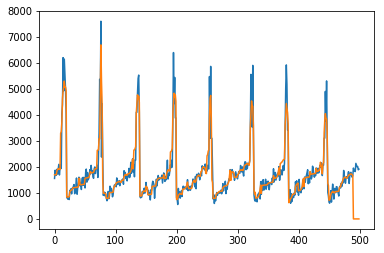

373.9095513604367


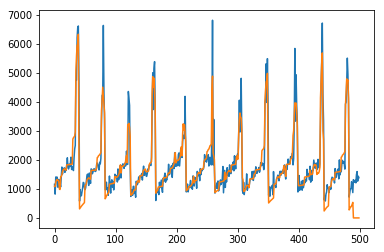

393.78733160417204


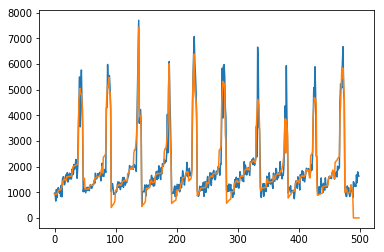

402.14855494925075


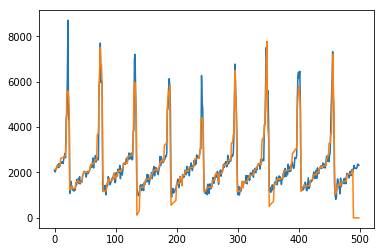

404.18131778342314


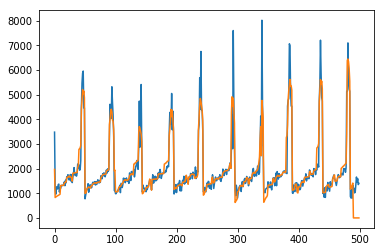

419.49347594473693
Best reconstructions of ordinary lightcurves


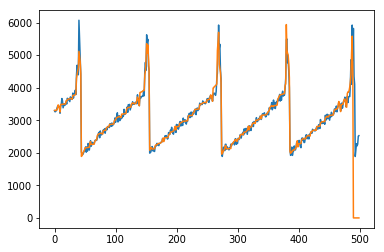

125.7863029503638


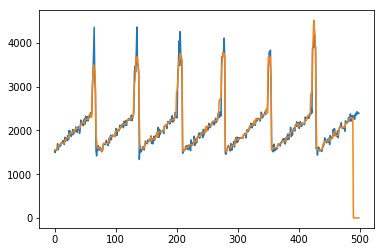

130.429534839404


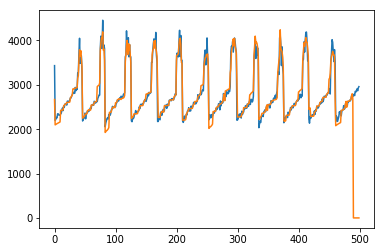

137.78647977350317


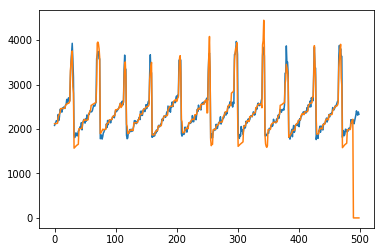

140.3224578813842


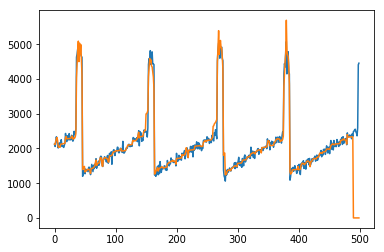

142.123679076045
Worst reconstructions of outlier lightcurves


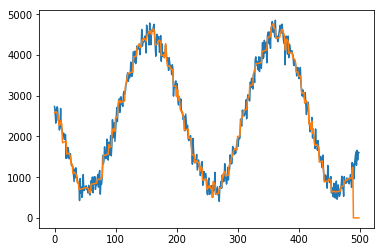

147.6533524680562


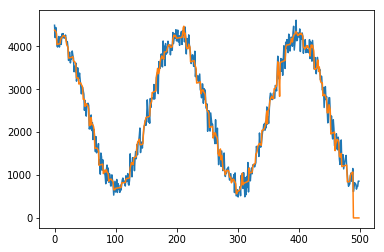

148.11336322176322


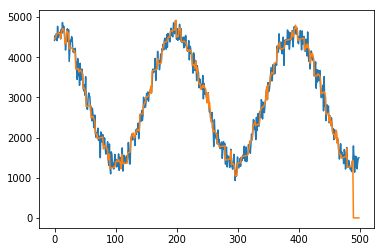

148.97268721547755


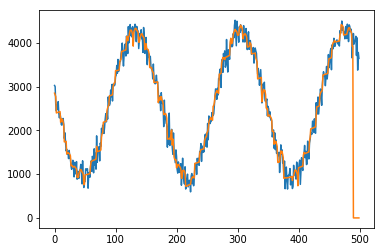

150.40179361701533


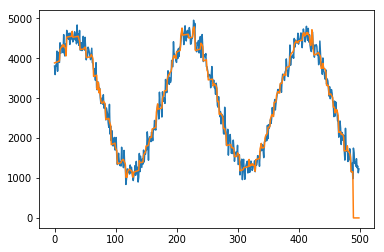

152.58674940926804
Best reconstructions of outlier lightcurves


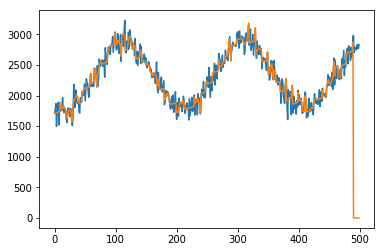

99.97371597667404


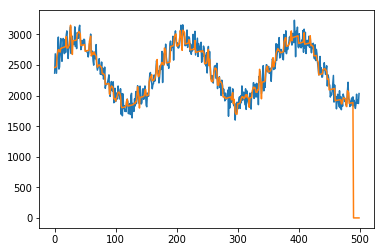

103.9023032861778


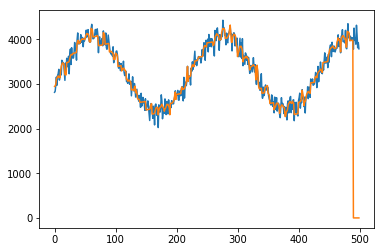

110.21758643538708


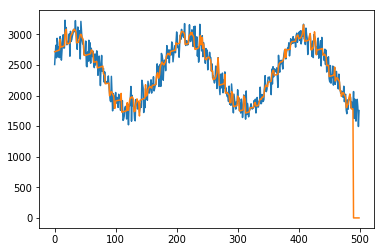

110.92266244577749


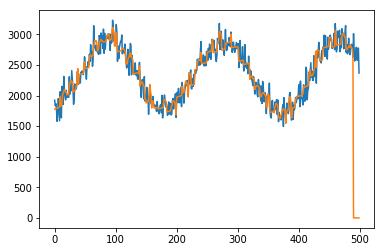

111.93448601912272
('no. clusters: ', 150, 'segment length: ', 50)
Worst reconstructions of ordinary lightcurves


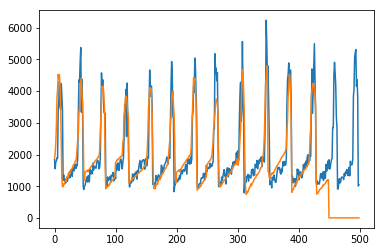

564.1531823603311


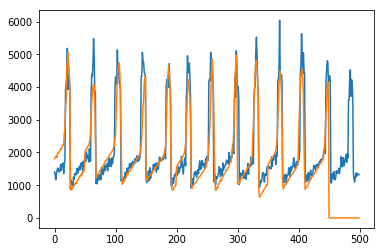

567.9170790261643


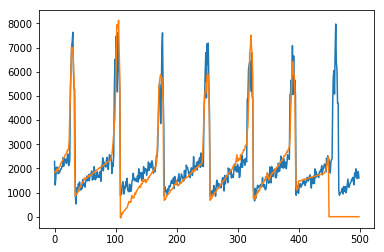

570.4890910574807


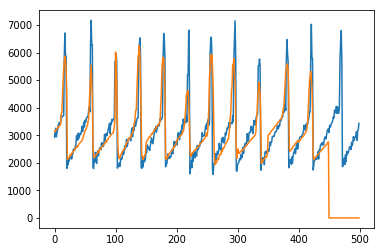

628.7073376485987


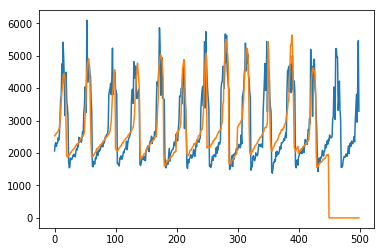

671.7941767040652
Best reconstructions of ordinary lightcurves


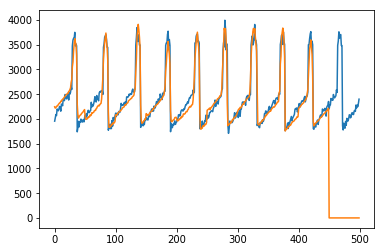

158.5571292583507


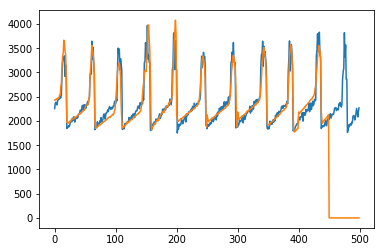

189.1270668098328


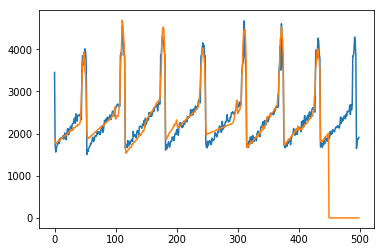

195.75380929455432


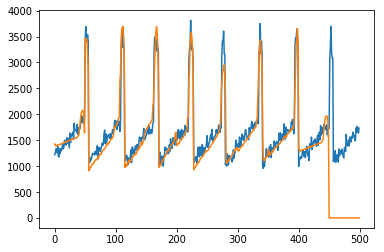

198.52121962595467


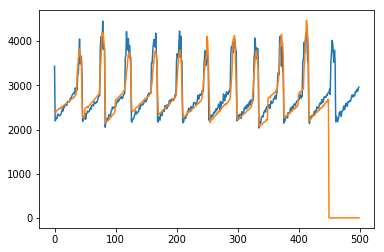

215.4310849823296
Worst reconstructions of outlier lightcurves


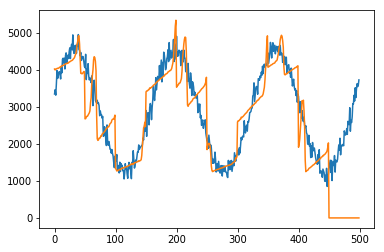

519.5757102519582


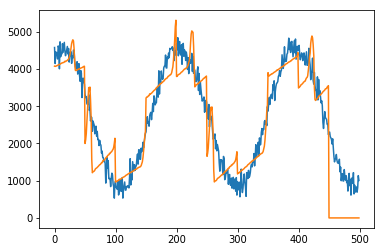

525.5946950187644


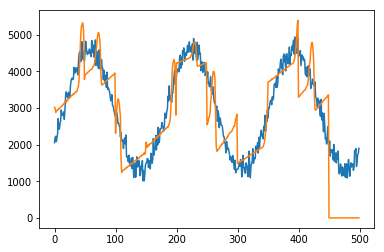

527.7596831911443


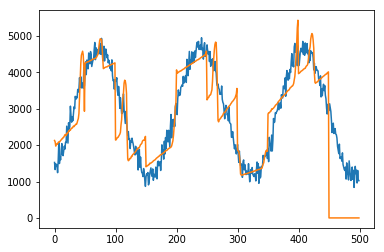

539.3476158095169


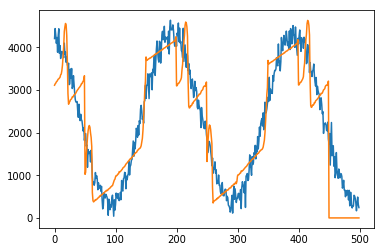

540.8157888151611
Best reconstructions of outlier lightcurves


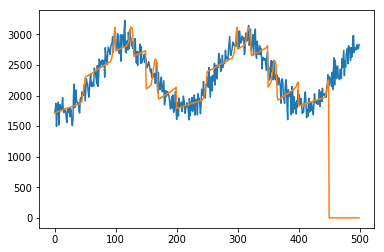

172.85788624739152


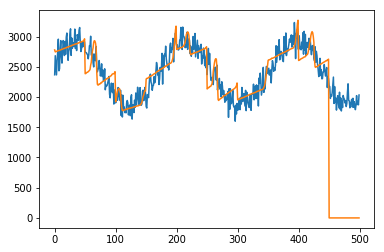

194.4166633118852


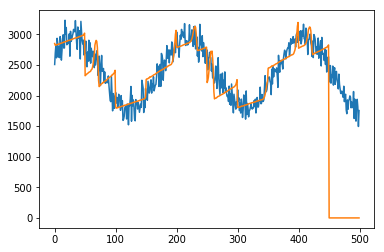

198.8530309214031


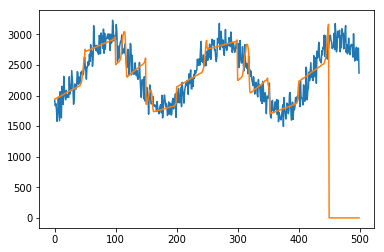

201.53279260198147


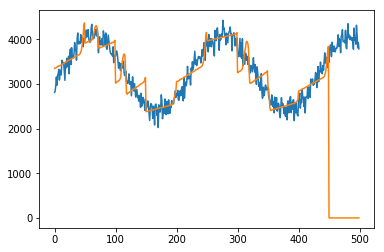

241.6326048182081
('no. clusters: ', 150, 'segment length: ', 100)
Worst reconstructions of ordinary lightcurves


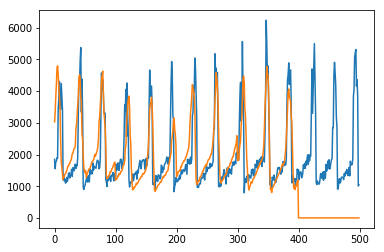

805.7445392510684


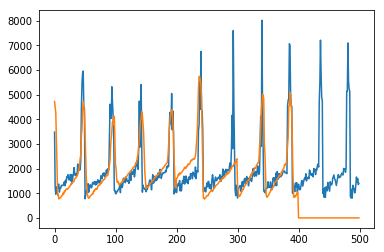

826.8622604630324


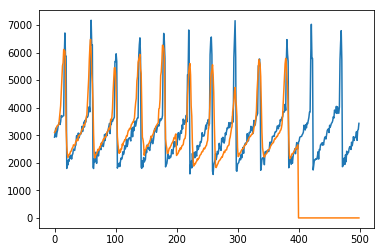

842.3379449962856


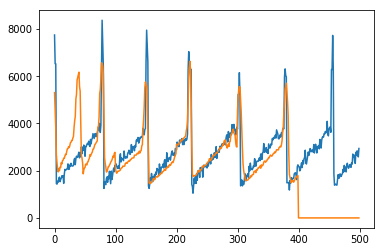

862.8138188637898


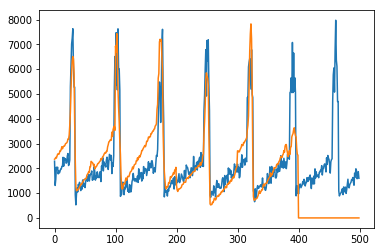

890.922221166668
Best reconstructions of ordinary lightcurves


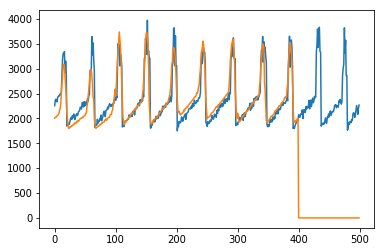

239.0010761971777


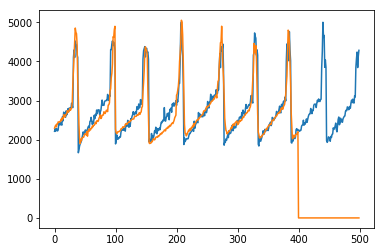

295.0318018076322


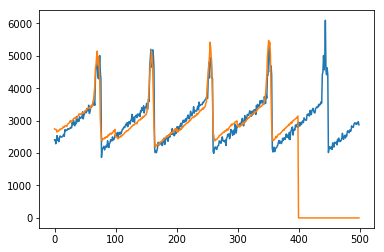

296.97059926020955


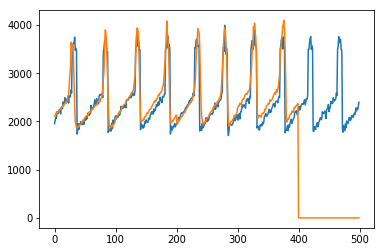

305.1806395337434


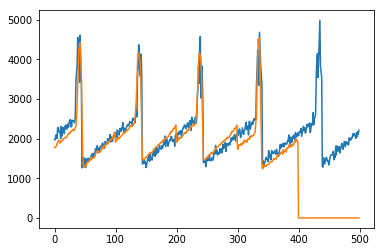

308.70352938481153
Worst reconstructions of outlier lightcurves


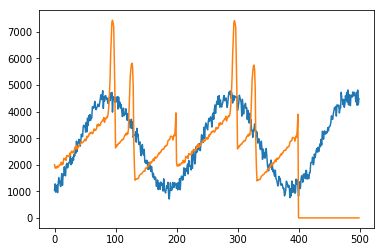

1133.6183859614346


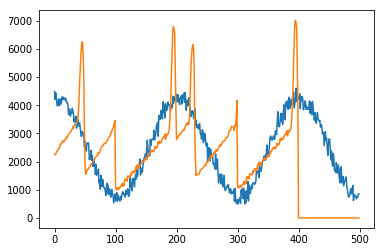

1193.9675394355604


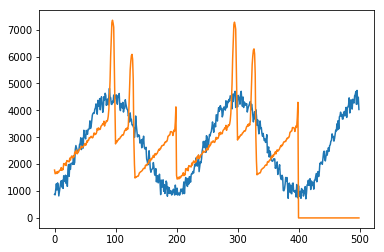

1200.7222257512346


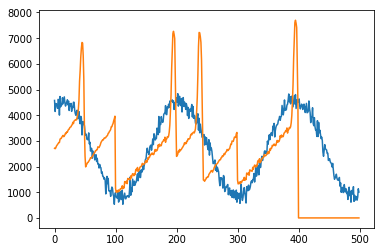

1258.6970955831173


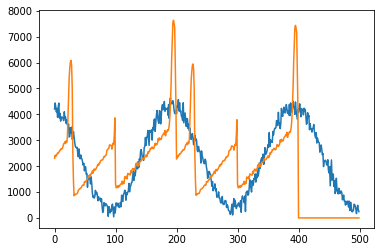

1336.0723997069026
Best reconstructions of outlier lightcurves


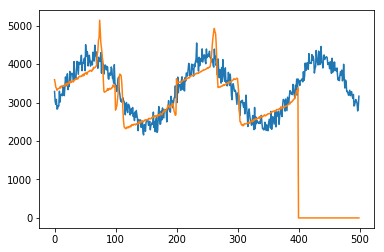

329.76988547029305


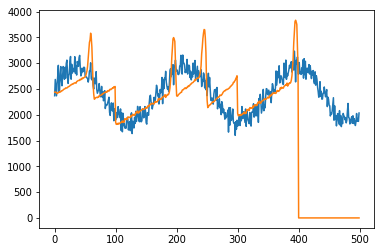

338.15960137293666


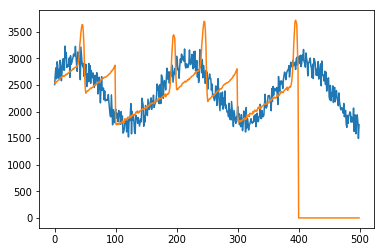

350.6472382308119


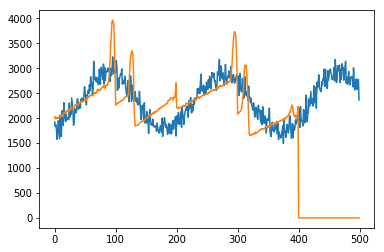

360.39315221083933


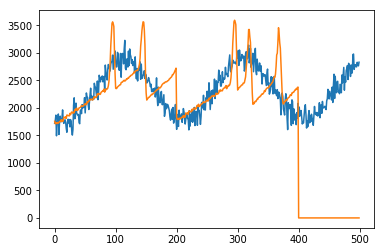

369.67777008436866
('no. clusters: ', 150, 'segment length: ', 150)
Worst reconstructions of ordinary lightcurves


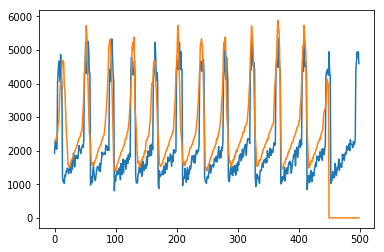

928.9752051129569


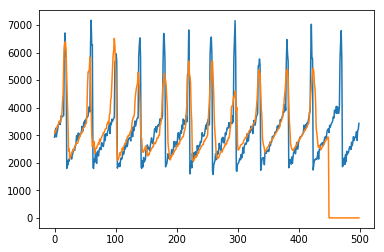

935.3890776692454


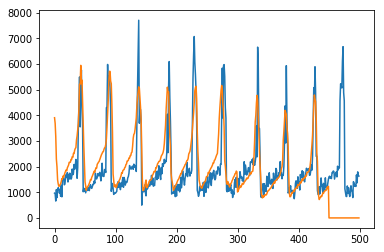

941.0601009698149


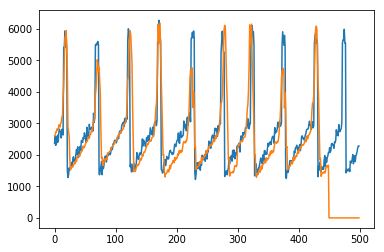

942.4395118956477


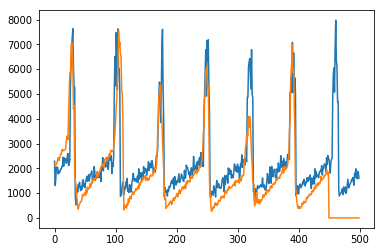

1055.9049950420263
Best reconstructions of ordinary lightcurves


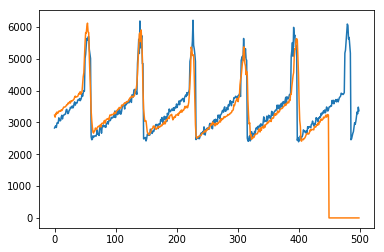

329.8474557183753


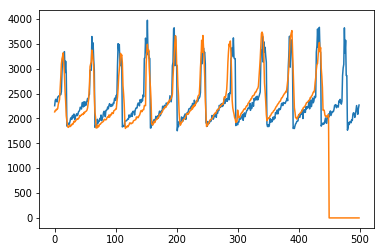

342.3189972418483


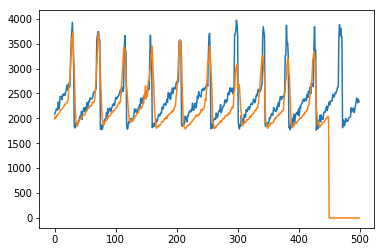

352.7679562729449


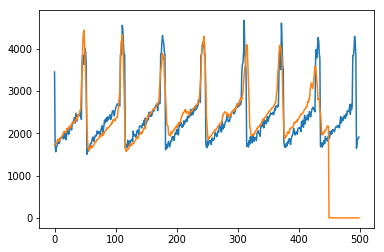

363.08215099404424


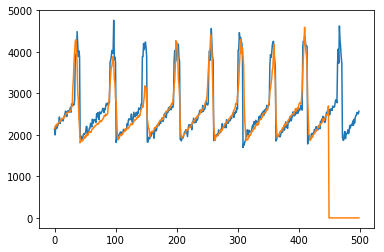

372.55265265589975
Worst reconstructions of outlier lightcurves


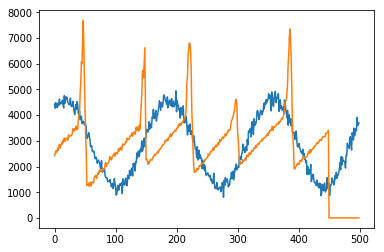

1425.4101162374216


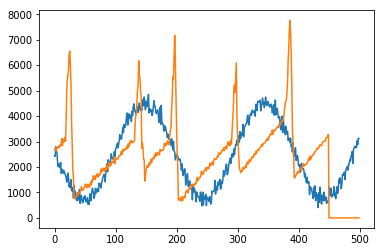

1427.1729591585572


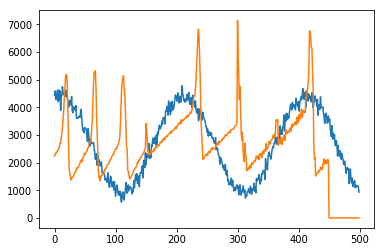

1445.6498072897818


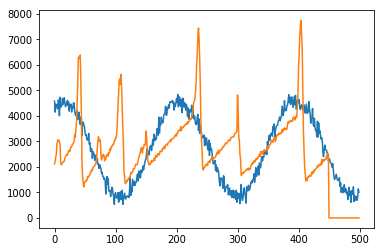

1489.8625739937163


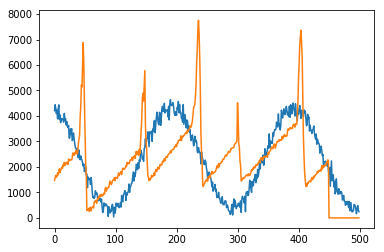

1525.2162647544765
Best reconstructions of outlier lightcurves


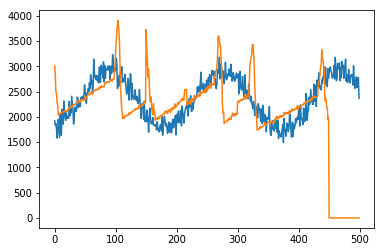

444.0477734578918


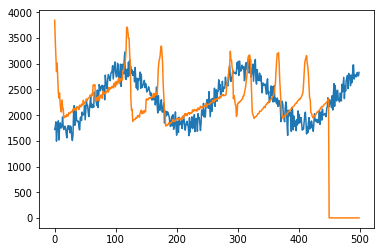

449.9738836894935


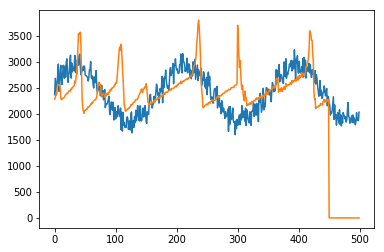

461.782581666992


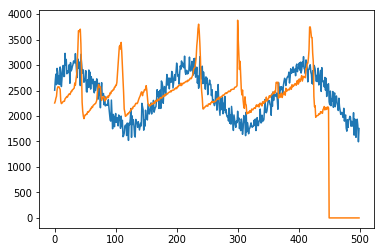

498.19401247177206


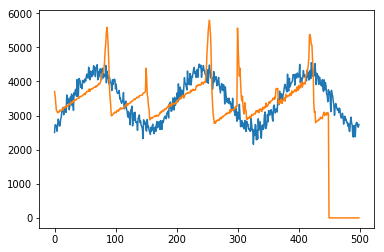

599.7006115669295
('no. clusters: ', 150, 'segment length: ', 200)
Worst reconstructions of ordinary lightcurves


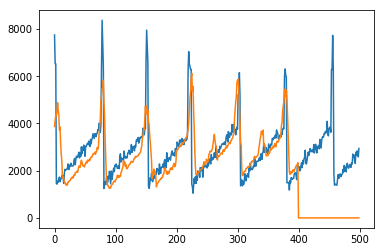

1065.121024587284


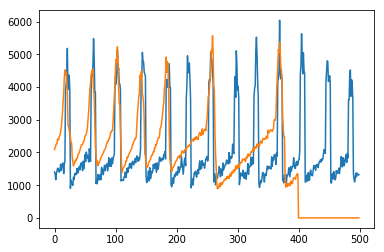

1091.2574053802357


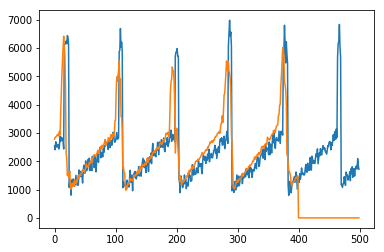

1107.9620896475888


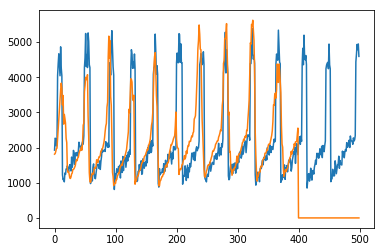

1108.0100550312086


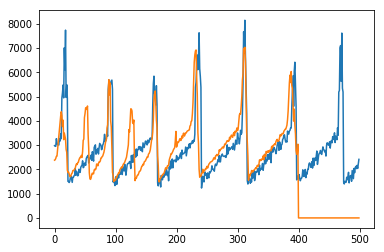

1108.8226426523343
Best reconstructions of ordinary lightcurves


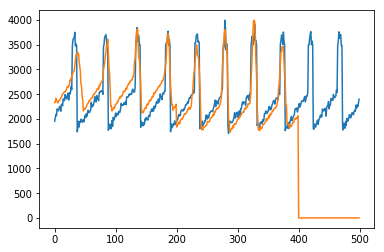

364.06283662209364


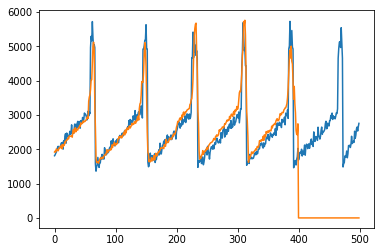

369.8939667278677


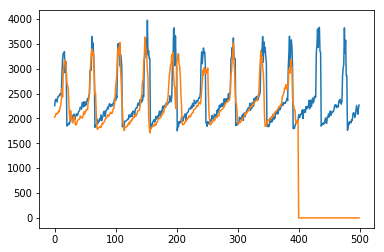

379.21095529609335


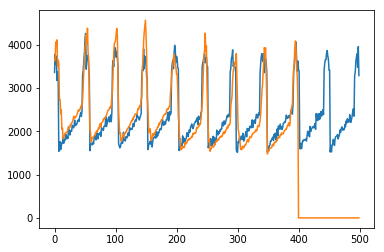

383.37843074025085


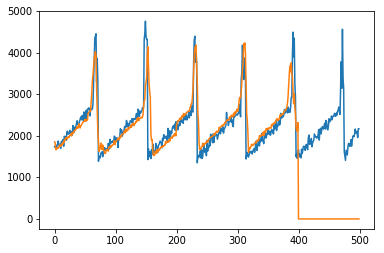

385.06068597482556
Worst reconstructions of outlier lightcurves


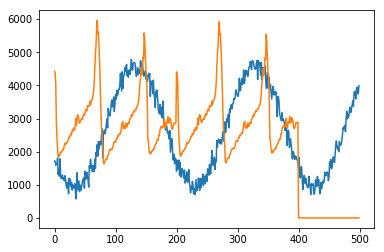

1616.8000239040082


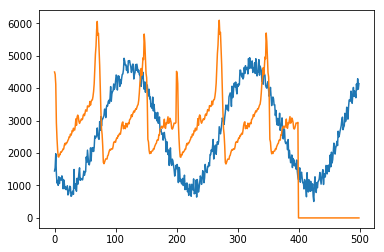

1619.663853880894


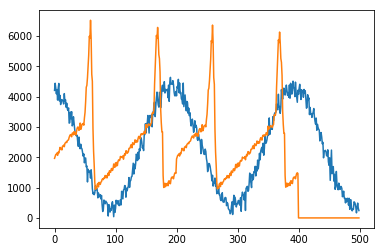

1678.5246726914083


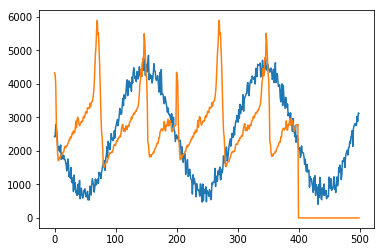

1715.631302822228


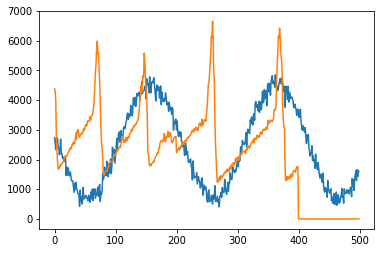

1787.3415609871756
Best reconstructions of outlier lightcurves


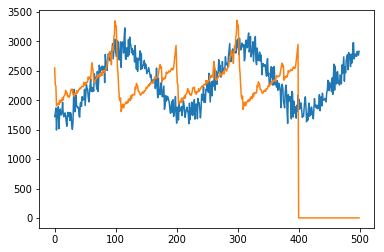

415.8805796946855


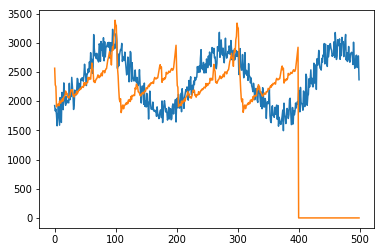

420.55723017428727


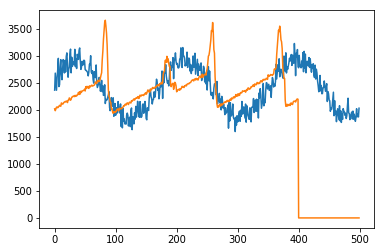

450.49598979776954


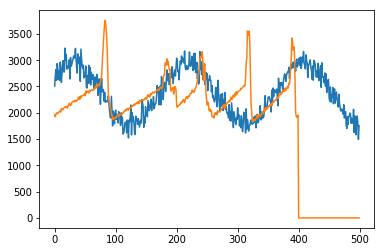

496.0415727301145


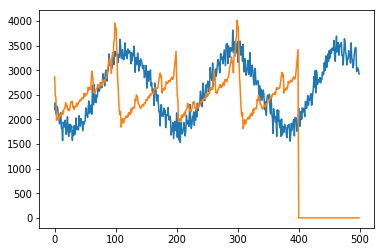

592.3896580707981


In [69]:

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))),test_size=0.25, random_state=0)

plot_worst_training=True
plot_best_training=True
plot_worst_test=True
plot_best_test=True

hyperparameter_set=0
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print(("no. clusters: ", k_cluster, "segment length: ", seg_len))
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(all_train_segments)
        
        ids=output[int((hyperparameter_set+1)*3 -1)]
        def plot_reco(lc):
            valid_segments= sc.segmentation(lc, seg_len, seg_len , time_stamps=False)
            reco = sc.reconstruct(valid_segments, lc, cluster, rel_offset=False, seg_slide=seg_len)
            error=np.sqrt(np.mean((lc[0:-seg_len]-reco[0:-seg_len])**2))
            plt.plot(lc)
            plt.plot(reco)
            plt.show()
            print(error)
            return
        
        if plot_worst_training is True:
            print("Worst reconstructions of ordinary lightcurves")
            for lc_id in ids[0]:
                lc=rho_valid[lc_id]
                plot_reco(lc)
        
        if plot_best_training is True:
            print("Best reconstructions of ordinary lightcurves")
            for lc_id in ids[1]:
                lc=rho_valid[lc_id]
                plot_reco(lc)
        if plot_worst_test is True:
            print("Worst reconstructions of outlier lightcurves")
            for lc_id in ids[2]:
                lc=sine_file[lc_id]
                plot_reco(lc)
        if plot_best_test is True:
            print("Best reconstructions of outlier lightcurves")
            for lc_id in ids[3]:
                lc=sine_file[lc_id]
                plot_reco(lc)
        
        hyperparameter_set+=1

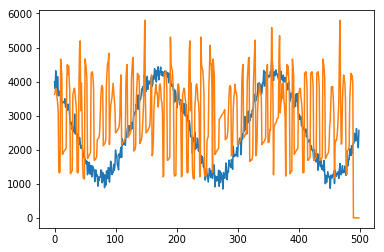

1544.88690581608


In [63]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster_scaled as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


#reco_classes=[]
k_cluster=150
seg_len=10

##train the model
#loop throught the light curves of a given class and segments them
all_train_segments=[]
for rho in rho_train:
    train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
#cluster the segments
cluster=KMeans(n_clusters=k_cluster, random_state=0)
cluster.fit(all_train_segments)

        #reconstruction loop through light curves for every class other than rho              
sine=sine_file[182]
valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
reco = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
plt.plot(sine)
plt.plot(reco)
plt.show()
print(np.sqrt(np.mean((reco-sine)**2)))
        
#         reco_error_ar=np.array(reco_error)
#         max_rho=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
#         valid_segments= sc.segmentation(rho_valid[int(max_rho[3])], seg_len, seg_len , time_stamps=False)
#         reco, error = sc.reconstruct(valid_segments, rho_valid[int(max_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
#         f = plt.figure()
#         ax = f.add_subplot(211)
#         plt.plot(rho_valid[int(max_rho[3])])
#         plt.plot(reco)
#         plt.ylim([0,10000])
#         plt.text(1,1,"k= {}\nlen= {}\n error= {}".format(k_cluster, seg_len, round(max_rho[-1],1)),
#                  ha='right', va='top', transform=ax.transAxes)
#         min_rho=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
#         valid_segments= sc.segmentation(rho_valid[int(min_rho[3])], seg_len, seg_len , time_stamps=False)
#         reco, error = sc.reconstruct(valid_segments, rho_valid[int(min_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)


In [75]:
np.random.randint(500)

311

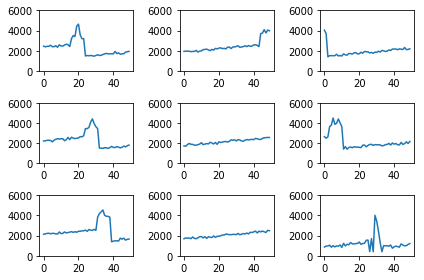

In [39]:
f = plt.figure()

for n, seg in enumerate(cluster.cluster_centers_[0:9]):
    ax = f.add_subplot(3,3,n+1)
    plt.plot(seg)
    plt.ylim(0,6000)
plt.tight_layout()
plt.show()
                              

In [11]:
interval

265.9890335025607

In [16]:
np.savetxt("synthetic_sines_wide.csv" ,sines, delimiter=',')

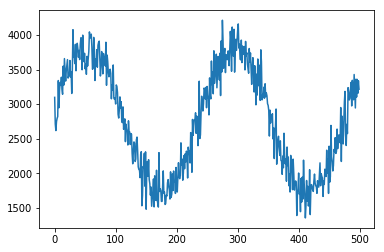

In [14]:
pred_centroid_index=kmeans_model.predict(np.array(segment).reshape(1, -1))[0]

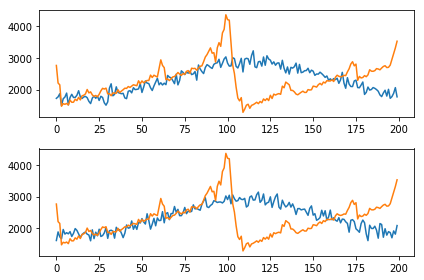

1125.68696544148


In [70]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


#reco_classes=[]
k_cluster=150
seg_len=200


##train the model
#loop throught the light curves of a given class and segments them
all_train_segments=[]
for rho in rho_train:
    train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
#cluster the segments
cluster=KMeans(n_clusters=k_cluster, random_state=0)
cluster.fit(all_train_segments)

        #reconstruction loop through light curves for every class other than rho              
sine=sine_file[122]
valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
# for seg in valid_segments:
#     plt.plot(seg)
#     pred_centroid_index=cluster.predict(np.array(seg).reshape(1, -1))[0]
#     plt.plot(cluster.cluster_centers_[pred_centroid_index])
#     plt.show()
    
    
f = plt.figure()

for n, seg in enumerate(valid_segments[0:9]):
    ax = f.add_subplot(2,1,n+1)
    plt.plot(seg)
    pred_centroid_index=cluster.predict(np.array(seg).reshape(1, -1))[0]
    plt.plot(cluster.cluster_centers_[pred_centroid_index])
plt.tight_layout()
plt.show()
print(np.sqrt(np.mean((reco-sine)**2)))

(array([ 5., 12., 25., 33., 47., 48., 41., 26., 10.,  3.]),
 array([162.8435388 , 170.38372216, 177.92390552, 185.46408889,
        193.00427225, 200.54445561, 208.08463898, 215.62482234,
        223.16500571, 230.70518907, 238.24537243]),
 <a list of 10 Patch objects>)

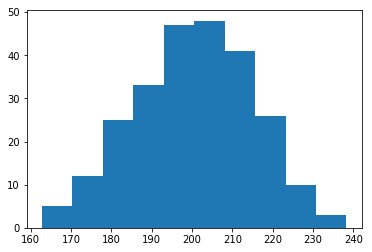

In [14]:
plt.hist(np.random.normal(200, 15,250))

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split


#synthesise sine waves that span the same range as the synthetic rho

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)
list_mins=np.min(rho_train, axis=1)
list_maxs=np.max(rho_train, axis=1)

small_maxs=list_maxs[np.where(list_maxs<5000)[0]]

#"outlier" lightcurves
no_sines=250
lc_len=500
sines=np.zeros((no_sines,lc_len))
for sine in range(no_sines):
    #wavelength of 30-160
    start=np.random.rand()*2*np.pi
    interval=np.random.normal(200, 15)
    xs=np.linspace(start,(lc_len/interval)*2*np.pi+start, num=500)
    ys=np.sin(xs)
    range_ind=np.random.randint(len(small_maxs))
    ys+=1
    ys=(ys/2)*(small_maxs[range_ind]-list_mins[range_ind])
    ys+=np.random.normal(0,200 ,len(ys))
    if np.min(ys)<0:
        ys+=abs(np.min(ys))
    ys*=(small_maxs[range_ind]-list_mins[range_ind])/np.max(ys)
    ys+=list_mins[range_ind]
    sines[sine,:]=ys

k_clusters:  [150, 200, 250] 
seg_lens:  [10, 20, 30, 40]


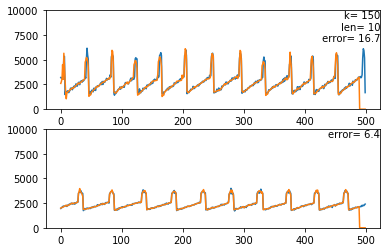

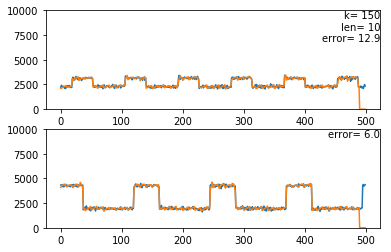

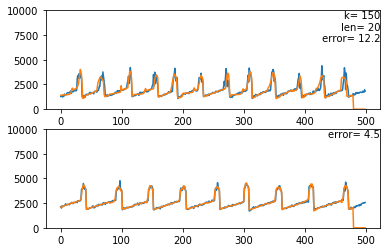

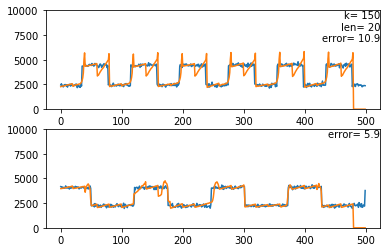

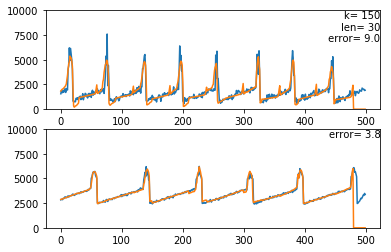

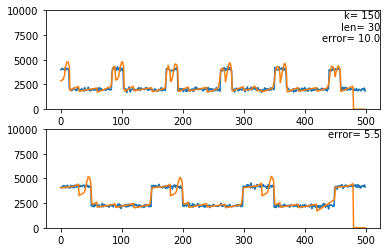

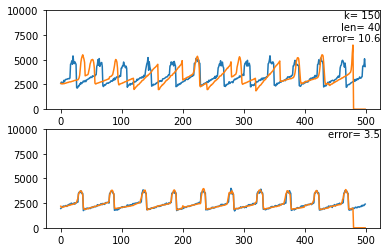

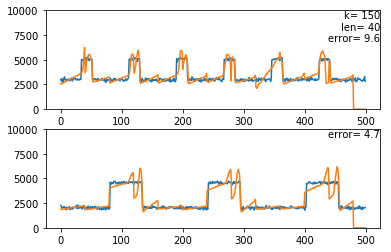

KeyboardInterrupt: 

In [65]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_boxes_thick.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


# inverted_rho=np.copy(rho_valid)
# sine_file=inverted_rho
# for n, in_rho in enumerate(inverted_rho):
#     rho_mean=np.mean(in_rho)
#     inverted_rho[n]-=np.mean(in_rho)
#     inverted_rho[n]*=-1
#     inverted_rho[n]+=abs(np.min(inverted_rho[n])-np.min(rho_valid[n]))




reco_error=[]
#reco_classes=[]
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
print("k_clusters: ", k_clusters, "\nseg_lens: ", seg_lens, flush=True)

for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        ##train the model
        #loop throught the light curves of a given class and segments them
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(zscore(all_train_segments))

        ### reconstruction of the training class
        for n_rho, rho in enumerate(rho_valid):
            valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,0, n_rho, error))
            #print((k_id,len_id,0, n_rho, error), flush=True)
        
        reco_error_ar=np.array(reco_error)
        max_rho=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(max_rho[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, rho_valid[int(max_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(rho_valid[int(max_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\n error= {}".format(k_cluster, seg_len, round(max_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        min_rho=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(min_rho[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, rho_valid[int(min_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(rho_valid[int(min_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        reco_error=[]

        #reconstruction loop through light curves for every class other than rho              
        for n_sine, sine in enumerate(sine_file):
            valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((sine[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,1,n_sine, error))
            #print((k_id,len_id,1,n_sine, error), flush=True)
            
        reco_error_ar=np.array(reco_error)
        max_test=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(max_test[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, sine_file[int(max_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(sine_file[int(max_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\nerror= {}".format(k_cluster, seg_len, round(max_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        
        min_test=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(min_test[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, sine_file[int(min_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(sine_file[int(min_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        
        reco_error=[]
        

In [43]:
cluster.cluster_centers_

array([[-0.32088766, -0.75287301, -0.77480473, ..., -0.6688567 ,
        -0.61315525, -0.57397877],
       [-0.02033185, -0.14596199, -0.22815534, ...,  1.41558705,
         1.19015077,  0.94664162],
       [-0.52632864, -0.50320547, -0.48797864, ..., -0.49523709,
        -0.52606248, -0.56468793],
       ...,
       [-0.75664405, -0.74245402, -0.74717765, ..., -0.0069282 ,
         0.03147085,  0.11563842],
       [ 0.12761144,  0.12964913,  0.2332621 , ..., -0.19215961,
        -0.30572746, -0.32473814],
       [ 0.52802533,  0.56137799,  0.80193036, ...,  0.0787771 ,
         0.1051422 ,  0.13740996]])

In [44]:
std_ori=np.std(np.array(lc))
mean_ori=np.mean(np.array(lc))
scaled_centroids=np.copy(cluster.cluster_centers_)
scaled_centroids=mean_ori+(scaled_centroids-np.mean(scaled_centroids))*(std_ori/np.std(scaled_centroids))
scaled_centroids

array([[2499.80432798, 1907.30548951, 1877.2245685 , ..., 2022.53987379,
        2098.93839466, 2152.6717477 ],
       [2912.03813634, 2739.72739788, 2626.99333334, ..., 4881.50370253,
        4572.30170066, 4238.31147619],
       [2218.02731761, 2249.74239143, 2270.62708763, ..., 2260.67160322,
        2218.39237239, 2165.41479643],
       ...,
       [1902.13323689, 1921.59587608, 1915.11707914, ..., 2930.42220174,
        2983.0892393 , 3098.53109192],
       [3114.95294596, 3117.74778807, 3259.86039029, ..., 2676.36406152,
        2520.59761658, 2494.52311938],
       [3664.14926246, 3709.8948243 , 4039.82962472, ..., 3047.97315598,
        3084.1347741 , 3128.39232268]])

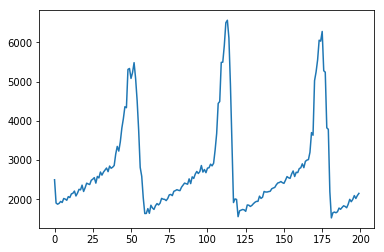

In [45]:
plt.plot(scaled_centroids[0])

In [52]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster_scaled as sc
import importlib
importlib.reload(sc)

from scipy.stats import zscore



np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25, random_state=0)

reco_error=[]
#reco_classes=[]
k_clusters=[150]
seg_lens=[10,50,100,150,200]

for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        ##train the model
        #loop throught the light curves of a given class and segments them
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(all_train_segments)      
        

        ### reconstruction of the training class
        for n_rho, rho in enumerate(rho_valid):
            valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
            reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
            error=np.sqrt(np.mean((rho[0:-seg_len]-reco[0:-seg_len])**2))
            reco_error.append((k_id,len_id,0, n_rho, error))
            print((k_id,len_id,0, n_rho, error), flush=True)


        #reconstruction loop through light curves for every class other than rho              
        for n_sine, sine in enumerate(sine_file):
            valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
            reco = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
            error=np.sqrt(np.mean((sine[0:-seg_len]-reco[0:-seg_len])**2))
            reco_error.append((k_id,len_id,1,n_sine, error))
            print((k_id,len_id,1,n_sine, error), flush=True)
reco_error_ar=np.array(reco_error)
np.savetxt("valid_results_20190604_bp7.csv", reco_error_ar, delimiter=",") 

(0, 0, 0, 0, 1258.3391918435555)
(0, 0, 0, 1, 1596.98749778104)
(0, 0, 0, 2, 1051.785575409643)
(0, 0, 0, 3, 1231.2774287597542)
(0, 0, 0, 4, 1161.9998395894627)
(0, 0, 0, 5, 1076.5389952650073)
(0, 0, 0, 6, 2259.541926200822)
(0, 0, 0, 7, 814.5646459869135)
(0, 0, 0, 8, 1746.0616563387623)
(0, 0, 0, 9, 915.0520718223363)
(0, 0, 0, 10, 595.7899185875418)
(0, 0, 0, 11, 908.341304795027)
(0, 0, 0, 12, 1203.3160070588374)
(0, 0, 0, 13, 1137.3968567468585)
(0, 0, 0, 14, 1172.9953936263253)
(0, 0, 0, 15, 1548.7518546348172)
(0, 0, 0, 16, 1067.3802983114945)
(0, 0, 0, 17, 1625.8372618972417)
(0, 0, 0, 18, 1680.1553858946593)
(0, 0, 0, 19, 1400.2135333364513)
(0, 0, 0, 20, 841.3343645426725)
(0, 0, 0, 21, 935.3726303763841)
(0, 0, 0, 22, 1425.4644514048025)
(0, 0, 0, 23, 1181.4226660839881)
(0, 0, 0, 24, 770.2689995968203)
(0, 0, 0, 25, 1138.0542454408774)
(0, 0, 0, 26, 2004.1823761223172)
(0, 0, 0, 27, 605.3767644408072)
(0, 0, 0, 28, 940.7097242753392)
(0, 0, 0, 29, 1096.8601033017324)
(0, 